# Informe nº1
    Notas: breve actualización del TFG
    Fecha: 02/04/2020
    
   ## Detección de nubes mediante varios algoritmos
    Se describe brevemente el algorimos mediante el cuál se suelen realizar la detección de nubes

In [77]:
!pip install cv
!pip install matplotlib

import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

path = './imagenes/'
file = 'nubes'

#### Procesado inicial de las imágenes
Todos los métodos que he estado viendo se basan en hacer un procesado de la imagen incial, y acto seguido realizar una máscara definiendo un umbral en alguno de los parámetros existenetes. En el método que pongo a continuación de ejemplo se basa en transformar la imagen de modo de color BGR a HSV, Matiz-SAturación-Valor (Hue-Saturation-Value). 

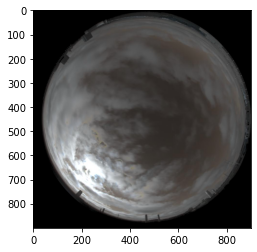

In [78]:
# Se lee la imagen, convirtiendola a una array de NxM pixeles, y de 3(B-G-R) canales, en total NxMx3
img = cv2.imread(path + file + '.png', 1)

# Se realiza un procesado inicial de la imagen
# En este caso se pasa la imagen de BGR a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(1)
plt.imshow(img)


### Máscara
Una vez hecho el procesado, unicamente establece un rango, comprobando pixel a pixel si pertenece a este rango. En el caso de que el pixel se encuentre en este rango, el valor de la máscara se pone a 255 (valor boleano alto), sino a 0 (valor boleano bajo). 
Teniendo la máscara hecha, se realiza un AND entre la imagen original y la máscara, obteniendo el resultado final, la porción de cielo que se encuentra despejada. 

In [79]:
# Fixed threshold cloud detection filter
white = np.array([255, 255, 255])
lowerBound = np.array([30,30,30])

mask = cv2.inRange(hsv, lowerBound, white)
res = cv2.bitwise_and(img, img, mask=np.uint8(mask))

### RESULTADOS

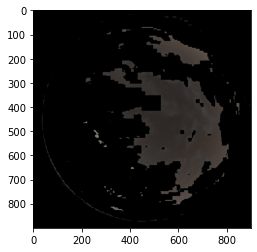

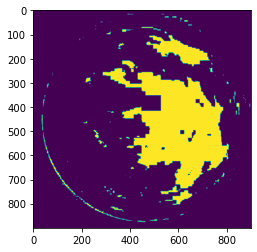

In [80]:
plt.figure(1)
plt.imshow(res)
plt.figure(2)
plt.imshow(mask)

## Algunos algortimos más
   ### Basados en el ratio R/B
Este método se basa en delimitar un rango de valores para el ratio R/B con el que podemos discernir del cielo, valores mas altos del canal azul, a difrenecia de las nubes, color blanco, valores altos de rojo y de azul.
Realizando un ajuste de los umbrales adecuado, en función de la cámara, podemos obtener unos resultados similares en a los métodos anteriores.

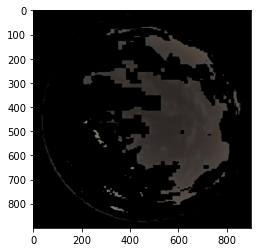

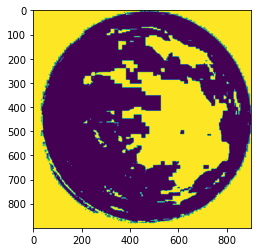

In [81]:
#  R/B Ratio cloud detection
mask = np.zeros((img.shape[0], img.shape[1]))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        B = B = int(img[i][j][0]); G = int(img[i][j][1]); R = int(img[i][j][2])
        if B > 0:
            cond1 = (R/B) < 0.9
        else:
            cond1 = True
        if cond1:
            mask[i][j] = 255
        else:
            mask[i][j] = 0

res = cv2.bitwise_and(img, img, mask=np.uint8(mask))
plt.figure(1)
plt.imshow(res)
plt.figure(2)
plt.imshow(mask)

## Basado en la diferencia R-B
De forma similar al criterio del ratio R/B, este método se basa en la diferencia entre los canales R y B para decidir si se trata de un pixel con nube o de cielo despejado.

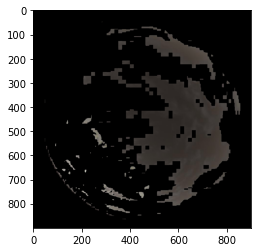

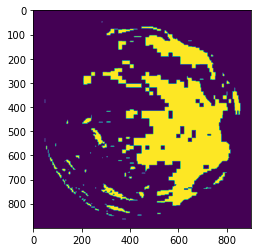

In [82]:
#  R-B Ratio cloud detection
mask = np.zeros((img.shape[0], img.shape[1]))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        B = int(img[i][j][0]); G = int(img[i][j][1]); R = int(img[i][j][2])
        cond1 = (B - R) > 7
        if cond1:
            mask[i][j] = 255
       
res = cv2.bitwise_and(img, img, mask=np.uint8(mask))
plt.figure(1)
plt.imshow(res)
plt.figure(2)
plt.imshow(mask)

## Criterios de Multi-Color

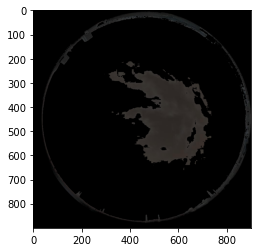

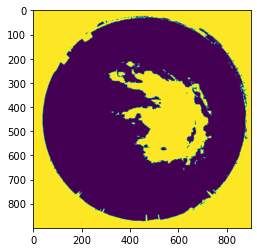

In [83]:
#  Multi-color criterium cloud detection
mask = np.zeros((img.shape[0], img.shape[1]))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        B = int(img[i][j][0]); G = int(img[i][j][1]); R = int(img[i][j][2])
        cond1 = B < (R + 30)
        cond2 = B < (G + 10)
        cond3 = B < 60
        if cond1 & cond2 & cond3:
            mask[i][j] = 255

res = cv2.bitwise_and(img, img, mask=np.uint8(mask))
plt.figure(1)
plt.imshow(res)
plt.figure(2)
plt.imshow(mask)

## Detección del disco solar
    En este apartado se describen algunos de los algoritmos/métodos de detección del sol, como se puede verá más adelante el procedimiento a seguir es muy similar que al seguido para la detección de nubes.

### Imagenes de pruebas
En los algorimos anteriores se ha seleccionado una imágen que contenga nubes, para estos ejemplos se utilizrán las siguintes imágenes, que considero que son buenas muestras de la realidad (una imagen del cielo totalmentes despejado y una imagen en la que el sol se encuentra parcialmente cubierto):

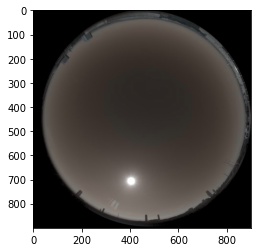

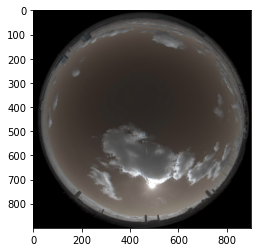

In [84]:
file_1 = 'despejado'
file_2 = 'pocas'

img_1 = cv2.imread(path + file_1 + '.png', 1)
img_2 = cv2.imread(path + file_2 + '.png', 1)

images = [img_1, img_2]

plt.figure(1)
plt.imshow(img_1)
plt.figure(2)
plt.imshow(img_2)

### Método con HSV
Los modelos de color HSV y HLS, son modelos alterativos al modelo estándar BGR ( ó RGB). EL espacio HSV queda definido por las componenetes Hue(H, matiz en español), Saturation(S, saturación en español) y Value(v, valor en español) de la siguiente forma

In [85]:
%%HTML
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Triangulo_HSV.png"
     alt="Triángulo HSV"
     style="float: left; margin-right: 5px;" />

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Cono_de_la_coloraci%C3%B3n_HSV.png"
     alt="Cono HSV"
     style="width:500px;height:500px;" />

Como podemos ver, los colores mas blancos, los que suele producir el sol al saturar los poxeles de la cámara, tienen valores altos junto con saturaciones bajas. De esta forma, se ha ideado el algoritmo siguinete para que considere pixeles soleados a los que presentan un valor de saturación inferior a 20 y un valor mayor a 230.

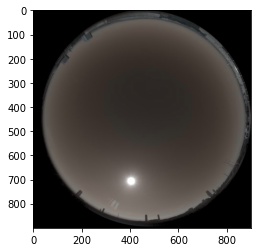

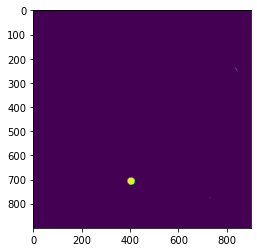

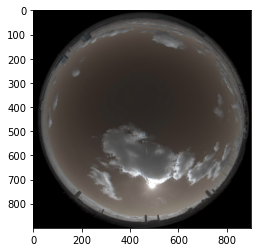

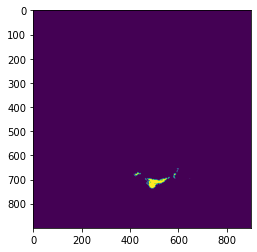

In [86]:
n=1
for img in images:
    # Deteccion del sol con tipo HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = np.zeros((img.shape[0], img.shape[1]))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            H = int(hsv[i][j][0]); S = int(hsv[i][j][1]); V = int(hsv[i][j][2])
            if (S<20) & (V>230):
                mask[i][j] = 255     
    plt.figure(n); n+=1
    plt.imshow(img)
    plt.figure(n)
    plt.imshow(mask); n+=1

Podemos ver que en un cielo despejado, las identidicaciñon del sol es casi perfecta. En cambio en cuanto al rededor del disc solar se encuentran nubes, la radiación del sol se refleja en las nubes, saturando los pixeles de la cámara, dando la sensación de que son pixeles solares.

## Método HLS
Con el modelo de color HLS(Hue, Lightness, Saturation) sucede una cosa similar, en este caso solo se tiene en cuenta la luminosidad para detectar el sol, como se ve en la siguinete imagen los pixeles más blancos son los que presentan los valores máximos de luminosidad:

In [87]:
%%HTML
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/HSL_color_solid_cylinder_saturation_gray.png"
     alt="Cilindro HLS"
     style="width:300px;height:300px;" />

Como podemos ver, el algoritmo es idéntico al anterior, igual que los resultados

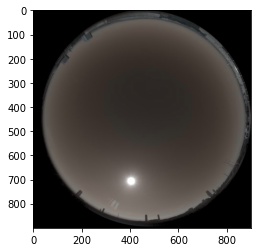

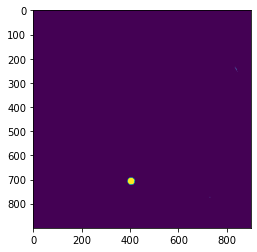

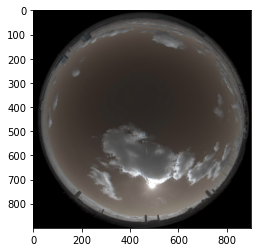

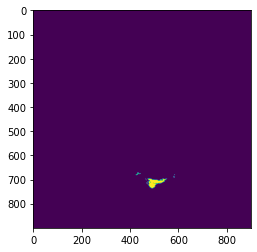

In [88]:
for img in images:
    # Deteccion del sol con tipo HLS
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    mask = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            H = int(hls[i][j][0]); L = int(hls[i][j][1]); S = int(hls[i][j][2])
            if L > 240:
                mask[i][j] = 255    
    plt.figure(n); n+=1
    plt.imshow(img)
    plt.figure(n)
    plt.imshow(mask); n+=1

## Método con el modelo HIS
El método es igual a los anteriores, pero en este caso, el valor que tenermos como guía es la intensidad, siendo esta la media de los valores de los tres canales (R,G,B), que a mi parecer es una variable más importante, ya que R+G+B = blanco, con lo que valores altos de esta variable indicarán valores cercanos a la saturación que producen los pixeles solares.

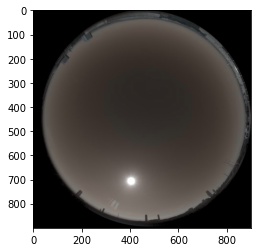

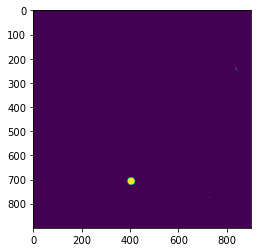

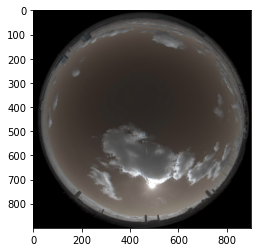

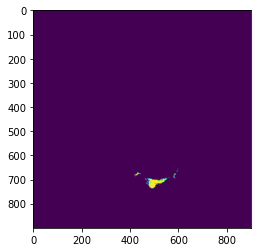

In [89]:
for img in images:
    # Deteccion del sol con tipo HIS
    mask = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            B = int(img[i][j][0]); G = int(img[i][j][1]); R = int(img[i][j][2])
            I = (B + G + R)/3
            if (I>230):
                mask[i][j] = 255  
    plt.figure(n); n+=1
    plt.imshow(img)
    plt.figure(n)
    plt.imshow(mask); n+=1

## Método solo utilizando el canal verde
Este método se basa en que los sensores de las cámaras generalmente tienen el doble de sesores de longitudes de onde cercanas al verde (intermedias) que de rojo o azul. Por lo que es más preciso en ese rango. De forma similiar establece dos umbrales, al primero lo llama HBP(High Brightness Pixels) y uno superior, CSP(Circumsolar Saturated Pixels). Calcula la circularidad del CSP, si es similar a un círculo, la máscara HBP la toma cómo el disco solar.

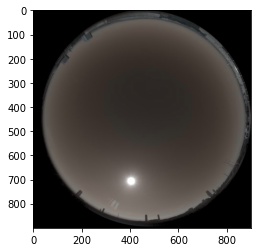

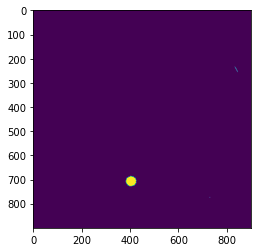

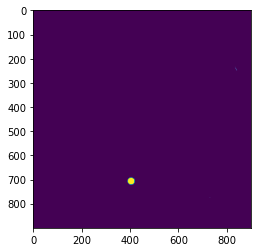

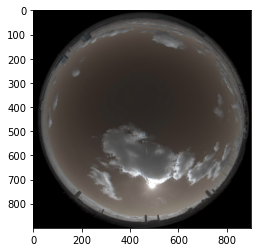

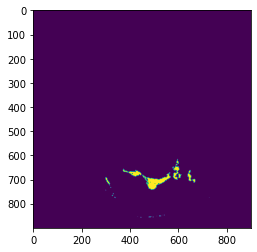

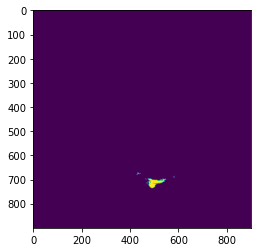

In [90]:
for img in images:
    # Copia del canal verde
    green_img = img.copy()
    green_img[:,:,0] = 0
    green_img[:,:,2] = 0
    
    CSP = np.zeros((img.shape[0], img.shape[1]))
    HBP = np.zeros((img.shape[0], img.shape[1]))
    
    for i in range(green_img.shape[0]):
        for j in range(green_img.shape[1]):
            green =  int(green_img[i][j][1])
            # High brightness pixels (HBP)
            if green > 180:
                HBP[i][j] = 255
                # Circumsolar saturaded pixels(CSP)
                if green > 245:
                    CSP[i][j] = 255
                    
    plt.figure(n); n+=1
    plt.imshow(img)
    plt.figure(n)
    plt.imshow(HBP); n+=1
    plt.figure(n)
    plt.imshow(CSP); n+=1

## Trabajos en proceso
+ Estoy probando mediante las máscaras halladas anteriormente, y aplicando los metodo disponibles en la librería openCV a detectar si hay circulos, puede llegar a ser util en el caso de que las nubes se encuentren obstruyendo parcialmente el sol.
+ Busqueda de nuevos método que puedan solucionar el problema del obstruido parcialmente por nubes, ya que es el pricipal problema ahora mismo.

# Comentarios 
+ Todas las imagenes de las pruebas que he ido haciendo estan en la carpeta de imagenes, nombradas segun el algoritmo utilizado.
+ He encontrado algunos artículos en los que plantean el uso de instrumentación radiométrica (pirheliómetros) a la hora de calcular la porción de los sol que se encuentra tapada por nubes, debido a que esto es un problema. No se si en nuestro caso esto es adecuado, debido a lo objetivos planteados.
+ He estado viendo que se pueden aplicar algoritmos de inteligencia artificial para predecir el moviemiento de las nubes, y por tanto predecir la porcion del sol obstruido por nubes.
+ En el método del canal verde, el autor del artículo, no realiza la comprobación en toda la imagen, sino que calcula los pixeles en los que se encontraria el sol, mediante el zenith y el azimuth. No he podido pobar este método debido a que desconozco estas variables del lugar donde se ham tomado las imágenes. Podría ser una prueba buena cuando se retorne a la normalidad y se monte la cámara en el IES.